In [1]:
import matplotlib
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np, scipy
from os import listdir

In [2]:
# Constants
SPEC_FMIN = librosa.note_to_hz(['A0'])[0]
HOP_LENGTH = 512
BINS_PER_OCTAVE = 36
SAMPLE_RATE = 22050

MIDI_MIN = librosa.note_to_midi('A0')
MIDI_MAX = librosa.note_to_midi('C8')


In [15]:
def create_spectrogram(wav_matrix):
    """Create spectrogram from given audio matrix"""
    logC = librosa.amplitude_to_db(wav_matrix)
    librosa.display.specshow(
        logC,
        sr=SAMPLE_RATE,
        x_axis='time',
        y_axis='cqt_note',
    )
#   plt.axis('off')
    plt.savefig(fname='1.jpeg', format='jpg')

In [16]:
def cqt_matrix(wav_file):
    x, sr = librosa.load(wav_file)
    
    if(sr != SAMPLE_RATE):
        x = librosa.resample(x, sr, SAMPLE_RATE)
    
    C = librosa.cqt(x, 
                    sr=SAMPLE_RATE, 
                    fmin=SPEC_FMIN,
                    bins_per_octave=BINS_PER_OCTAVE,
                    hop_length=HOP_LENGTH,
                    n_bins=264
                   )
#     logC = librosa.amplitude_to_db(np.abs(C))
#     return logC
    return np.abs(C)

In [5]:
def split_wav(wav_matrix, slice_shift=2):
    """Split loaded WAV file into many chunks with specified padding"""
    specs = []
    for i in range(2, wav_matrix[0].size-1):
        specs.append(wav_matrix[:, i-slice_shift:i+slice_shift+1])
    return specs

In [7]:
# path = 'D:\School\Bc\model\MAPS\AkPnBcht\MUS'
# specs = 'D:\School\Bc\model\spectrograms'
# files = listdir(path)

# wavs = [wav for wav in files if wav.endswith('.wav')]

In [13]:
cqt = cqt_matrix('D:\School\Bc\model\MAPS\AkPnBcht\MUS\MAPS_MUS-grieg_walzer_AkPnBcht.wav')

(array([1.117308e+06, 6.108500e+04, 2.262700e+04, 1.282500e+04,
        9.209000e+03, 6.813000e+03, 4.932000e+03, 3.633000e+03,
        2.725000e+03, 2.346000e+03, 2.084000e+03, 1.695000e+03,
        1.374000e+03, 1.119000e+03, 8.580000e+02, 7.510000e+02,
        5.830000e+02, 5.230000e+02, 4.760000e+02, 4.630000e+02,
        3.740000e+02, 3.830000e+02, 3.010000e+02, 2.350000e+02,
        2.040000e+02, 1.950000e+02, 1.620000e+02, 1.070000e+02,
        1.260000e+02, 8.100000e+01, 6.300000e+01, 5.200000e+01,
        4.700000e+01, 3.200000e+01, 1.600000e+01, 1.000000e+01,
        5.000000e+00, 5.000000e+00, 5.000000e+00, 3.000000e+00,
        3.000000e+00, 0.000000e+00, 3.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([0.        , 0.01029483, 0.02058967, 0.0308845 , 0.04117934,
        0.05147417, 0.061769  , 0.07206384, 0.08235867, 0.0926535 ,
        0.10294834, 0.11324317, 0.12353801, 0.13383284, 0.

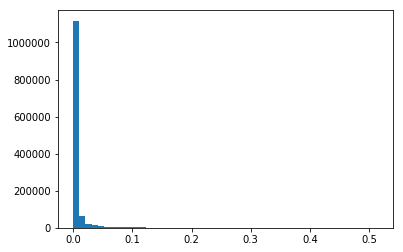

In [72]:
# Distribution of cqt matrix
plt.hist(np.concatenate(cqt[:, :]), bins=50)

0.0012425143197312756
0.0010088460148639552
0.001102475304763745
0.001023111531448617
0.0012496740194803471
0.000875105908974975
0.000797285989092538
0.0009167807920334263
0.0011925834879577813
0.0019669373014412207
0.002489401269975383
0.002189498044060963
0.0022419656329083697
0.001793287298421476
0.001705416351160558
0.0014859949045641708
0.0014272598767518588
0.0012162889326865504
0.0013168069048314385
0.0008977543828138794
0.000949592759184617
0.0010345358038074107
0.0011046826136936188
0.0012363932368766278
0.0010564232988210518
0.001142971192762679
0.0010354718405228942
0.001018785080380511
0.0011921664802904428
0.001136396309246662
0.0011980186740329468
0.0013407238421066074
0.0016173811234207241
0.0016239483301924262
0.00316090645123618
0.008899786195055423
0.008846297913160975
0.004969644925939572
0.0036585962580824066
0.004213463838225292
0.004427690504563261
0.004113994358374896
0.003884240366204109
0.004037798634166467
0.003416751271628862
0.003761571511774868
0.0050617505

In [33]:
# sps = split_wav(cqt_matrix('D:\School\Bc\model\MAPS\AkPnBcht\MUS\MAPS_MUS-grieg_walzer_AkPnBcht.wav'))

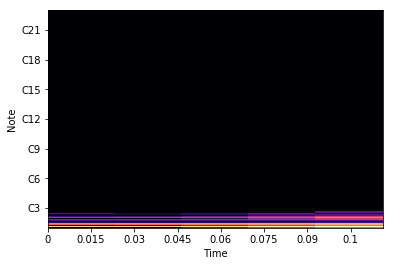

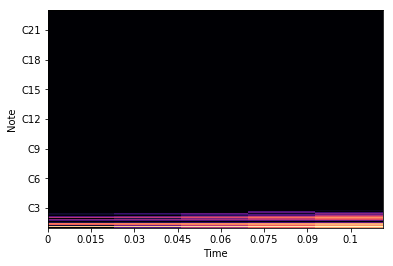

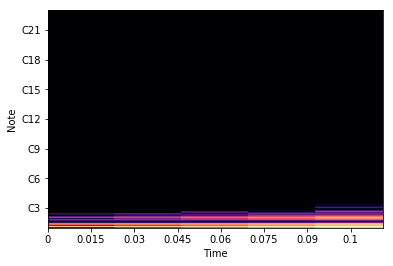

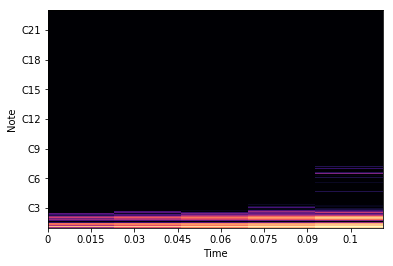

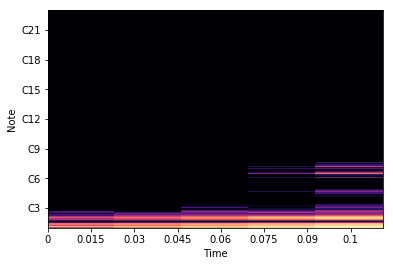

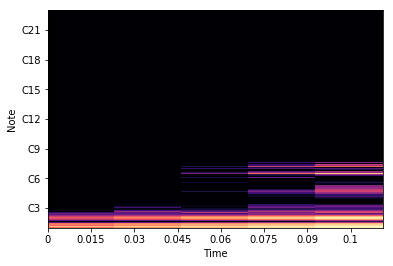

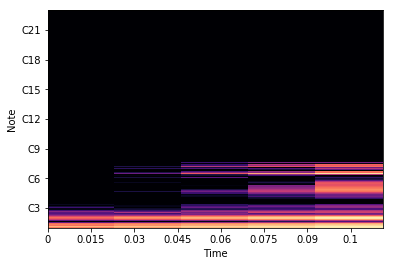

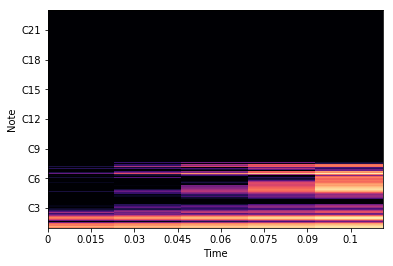

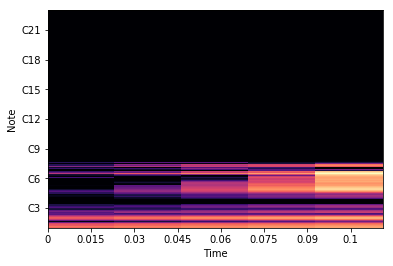

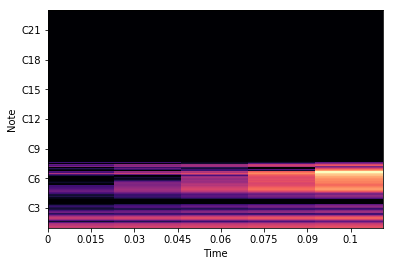

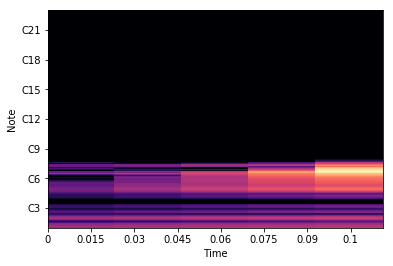

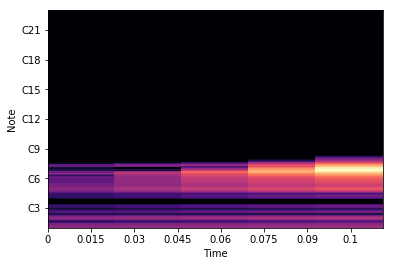

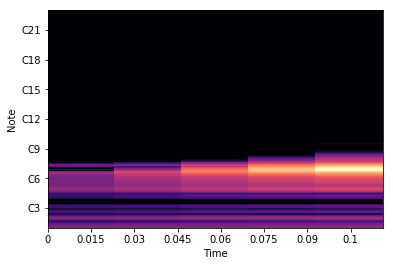

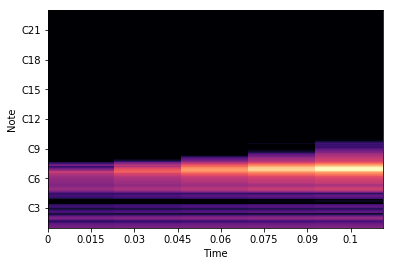

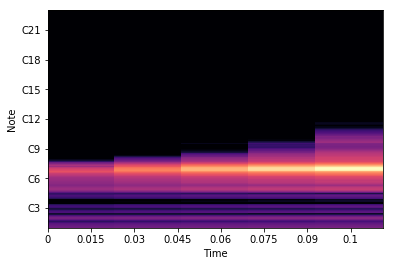

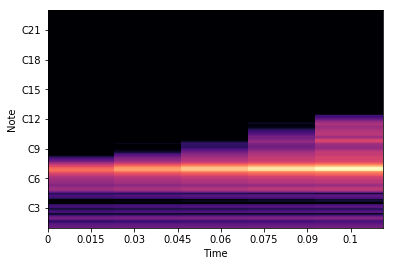

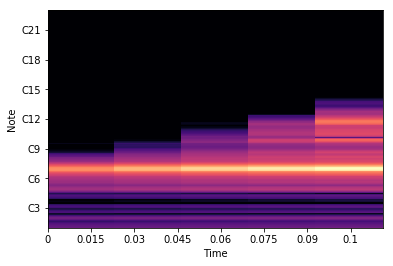

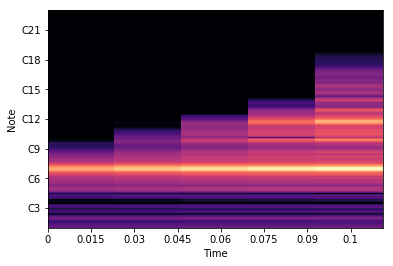

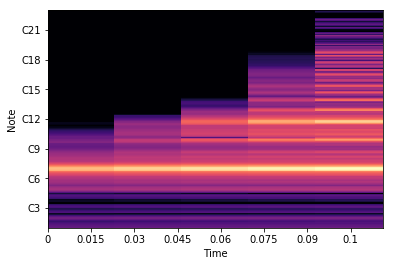

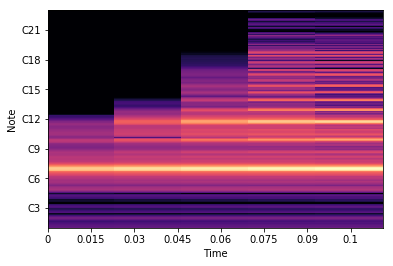

In [40]:
# for i in range(20):
#     librosa.display.specshow(
#         sps[i],
#         sr=SAMPLE_RATE,
#         x_axis='time',
#         y_axis='cqt_note',
#     )
#     plt.show()